In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


STEP 1 — Summary Statistics (Movement & Distribution)

In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


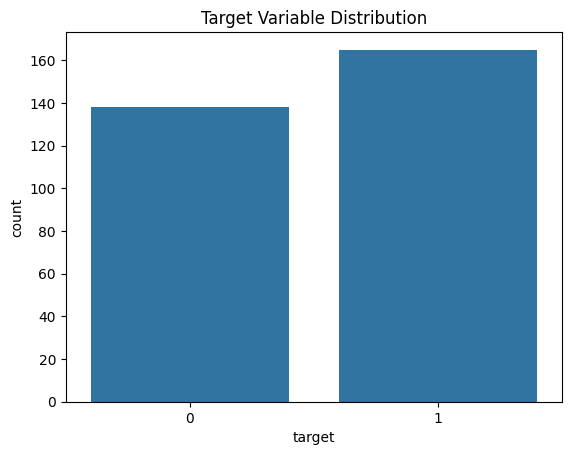

In [ ]:
# Visualize class balance
sns.countplot(x='target', data=df)
plt.title("Target Variable Distribution")
plt.show()

STEP 2 — Outliers & Missing Values

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols


['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

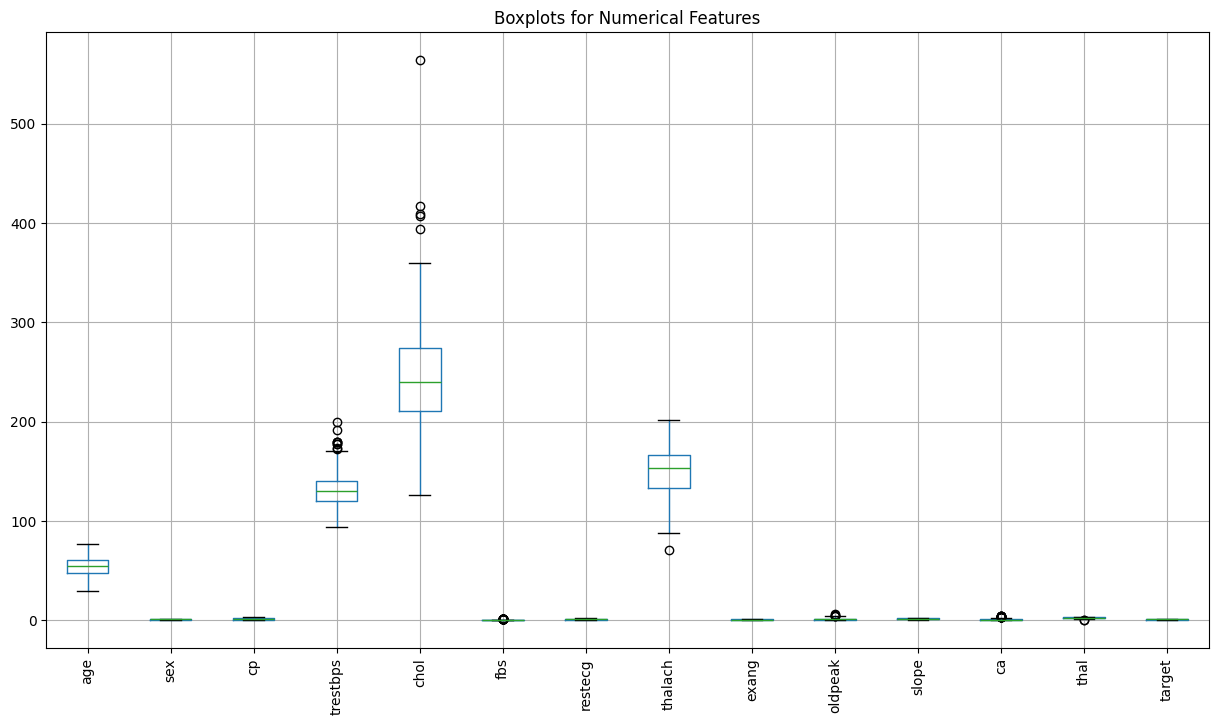

In [ ]:
plt.figure(figsize=(15, 8))
df[num_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots for Numerical Features")
plt.show()


Points far outside the box = potential outliers

Common in:

chol

trestbps

thalach

oldpeak

In [ ]:
outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = outliers.shape[0]

outlier_summary


{'age': 0,
 'sex': 0,
 'cp': 0,
 'trestbps': 9,
 'chol': 5,
 'fbs': 45,
 'restecg': 0,
 'thalach': 1,
 'exang': 0,
 'oldpeak': 5,
 'slope': 0,
 'ca': 25,
 'thal': 2,
 'target': 0}

STEP 3 — Imputation & Cleaning

As the dataset has no null values so no imputation needes, and we will skip this step

STEP 4 — Transformation

In [ ]:
X = df.drop(columns=['target'])
y = df['target']


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

STEP 5 — Auto-correlation

<Axes: >

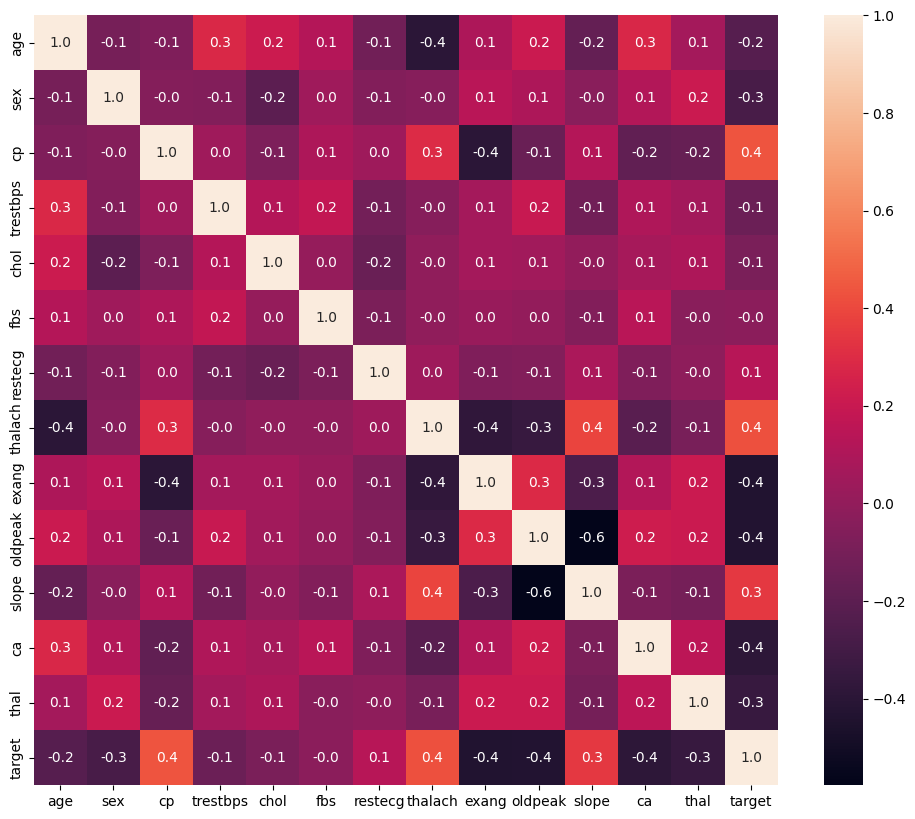

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".1f")

STEP 6 — Heteroscedasticity

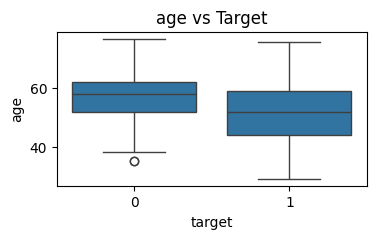

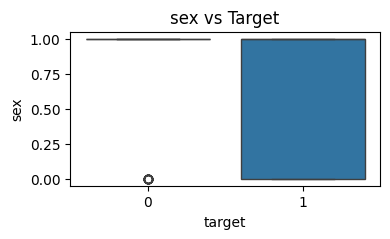

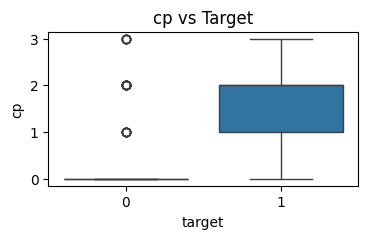

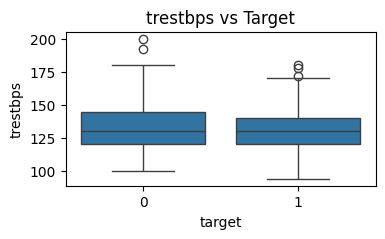

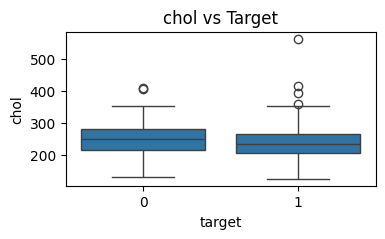

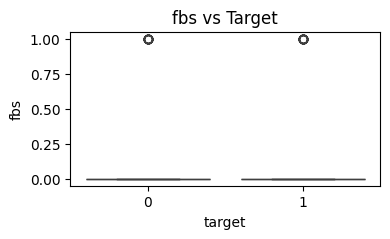

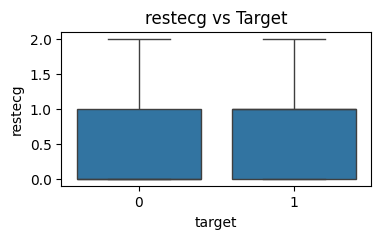

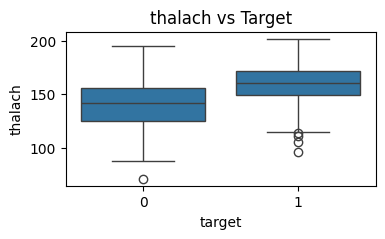

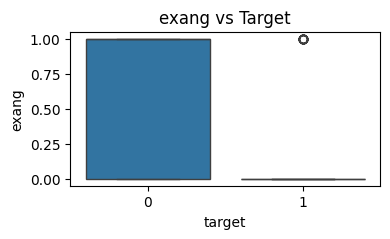

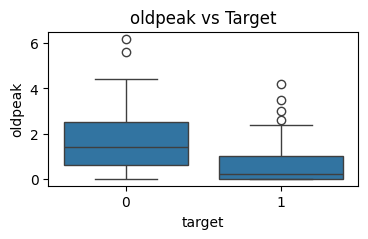

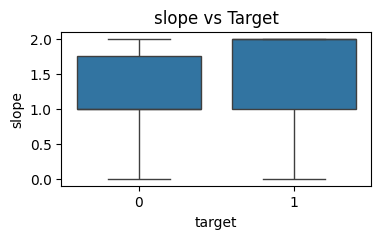

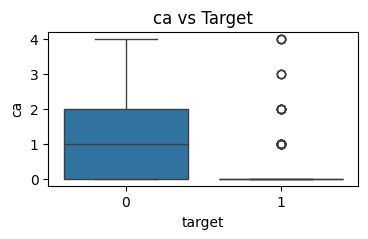

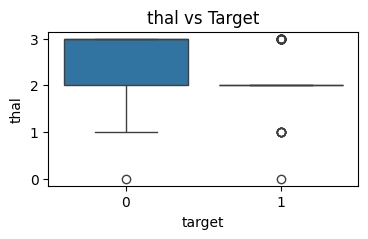

In [ ]:
for col in X.columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(x=y, y=df[col])
    plt.title(f"{col} vs Target")
    plt.show()


In [ ]:
variance_check = {}

for col in X.columns:
    var_0 = df[df['target'] == 0][col].var()
    var_1 = df[df['target'] == 1][col].var()
    variance_check[col] = abs(var_0 - var_1)

variance_check


{'age': 27.82018737584452,
 'sex': 0.10273414767845482,
 'cp': 0.0860339506715806,
 'trestbps': 89.3544076036818,
 'chol': 422.1512450088603,
 'fbs': 0.014288850686896476,
 'restecg': 0.03818757428219388,
 'thalach': 143.0521158594638,
 'exang': 0.12853829530765215,
 'oldpeak': 1.0814169464380088,
 'slope': 0.03731691132438841,
 'ca': 0.3681869433160173,
 'thal': 0.2519734112259897}

STEP 7 — Train–Test Split + Apply Scaling (Correctly)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y   # IMPORTANT for class balance
)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using same scaler
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_scaled.shape, X_test_scaled.shape


((242, 13), (61, 13))

STEP 8 — Build the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(
    max_iter=1000,       # ensures convergence
    random_state=42
)


In [ ]:
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = log_reg.predict(X_test_scaled)


In [ ]:
#Applying Sigmoid

y_pred_proba = log_reg.predict_proba(X_test_scaled)


In [ ]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coefficients


,Feature,Coefficient
2,cp,0.937735
7,thalach,0.539629
10,slope,0.307867
6,restecg,0.235471
0,age,0.017736
5,fbs,-0.063649
3,trestbps,-0.211437
4,chol,-0.459210
8,exang,-0.475883
11,ca,-0.559203


STEP 9 — Model Evaluation (Correctly, Not Superficially)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
cm


array([[19,  9],
       [ 3, 30]])

In [ ]:
accuracy_score(y_test, y_pred)

0.8032786885245902

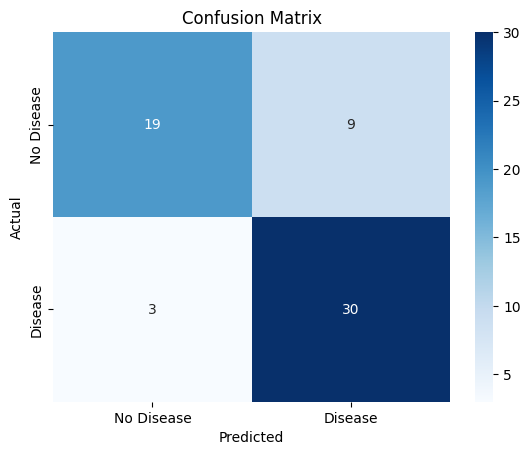

In [ ]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = y_pred_proba[:, 1]

fpr_vals, tpr_vals, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

auc_score


np.float64(0.8690476190476191)

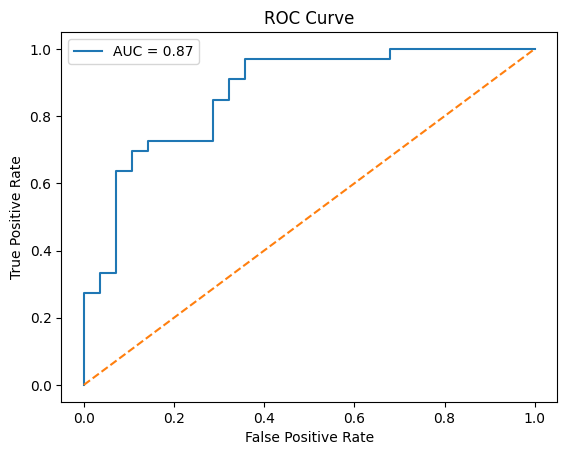

In [ ]:
plt.plot(fpr_vals, tpr_vals, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61



In [ ]:
TN, FP, FN, TP = cm.ravel()

sensitivity = TP / (TP + FN)   # TPR
specificity = TN / (TN + FP)   # TNR
fpr = FP / (FP + TN)

sensitivity, specificity, fpr


(np.float64(0.9090909090909091),
 np.float64(0.6785714285714286),
 np.float64(0.32142857142857145))

STEP 10 — Threshold Tuning (Decision-Aware Modeling)

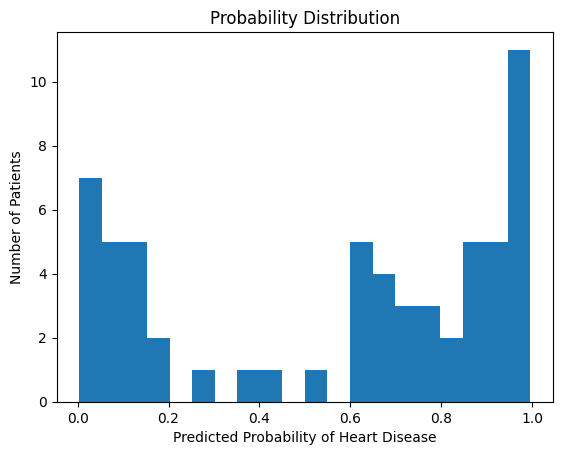

In [ ]:
plt.hist(y_prob, bins=20)
plt.xlabel("Predicted Probability of Heart Disease")
plt.ylabel("Number of Patients")
plt.title("Probability Distribution")
plt.show()


In [ ]:
#Trying different thresholds

import pandas as pd

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
results = []

for t in thresholds:
    y_pred_custom = (y_prob >= t).astype(int)
    cm_t = confusion_matrix(y_test, y_pred_custom)

    TN, FP, FN, TP = cm_t.ravel()

    results.append({
        "Threshold": t,
        "Accuracy": (TP + TN) / (TP + TN + FP + FN),
        "Sensitivity (TPR)": TP / (TP + FN),
        "Specificity": TN / (TN + FP)
    })

pd.DataFrame(results)


,Threshold,Accuracy,Sensitivity (TPR),Specificity
0,0.3,0.803279,0.939394,0.642857
1,0.4,0.786885,0.909091,0.642857
2,0.5,0.803279,0.909091,0.678571
3,0.6,0.786885,0.878788,0.678571
4,0.7,0.770492,0.727273,0.821429


In [ ]:
chosen_threshold = 0.4
y_final = (y_prob >= chosen_threshold).astype(int)


STEP 11 — Fine Tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate


In [ ]:
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)


In [ ]:
scoring = {
    'accuracy': 'accuracy',
    'roc_auc': 'roc_auc',
    'recall': 'recall',        # Sensitivity
    'precision': 'precision'
}


In [ ]:
cv_results = cross_validate(
    log_reg,
    X_train_scaled,
    y_train,
    cv=cv,
    scoring=scoring
)


In [ ]:
cv_summary = pd.DataFrame({
    'Metric': cv_results.keys(),
    'Mean Score': [cv_results[k].mean() for k in cv_results],
    'Std Dev': [cv_results[k].std() for k in cv_results]
})

cv_summary


,Metric,Mean Score,Std Dev
0,fit_time,0.010666,0.005915
1,score_time,0.017994,0.008227
2,test_accuracy,0.813605,0.100710
3,test_roc_auc,0.889601,0.060799
4,test_recall,0.870085,0.110926
5,test_precision,0.802044,0.083353
